# Exploratory Data Analysis Of Store Item Demand Forecasting Dataset

## Import required libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read datasets

In [41]:
# google colab
from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml project/train.csv', parse_dates = ['date'])
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml project/test.csv', parse_dates = ['date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# # jupyter
# df_train = pd.read_csv('train.csv', parse_dates = ['date'])
# df_test = pd.read_csv('test.csv', parse_dates = ['date'])

In [43]:
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [44]:
print('Train data min date: ', df_train['date'].min())
print('Train data max date: ', df_train['date'].max())

Train data min date:  2013-01-01 00:00:00
Train data max date:  2017-12-31 00:00:00


In [45]:
df_test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [46]:
print('Test data min date: ', df_test['date'].min())
print('Test data max date: ', df_test['date'].max())

Test data min date:  2018-01-01 00:00:00
Test data max date:  2018-03-31 00:00:00


In [47]:
df_all= pd.concat([df_train, df_test], sort= False)

In [48]:
df_all.head(-10)

,date,store,item,sales,id
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,NaN
2,2013-01-03,1,1,14.0,NaN
3,2013-01-04,1,1,13.0,NaN
4,2013-01-05,1,1,10.0,NaN
...,...,...,...,...,...
44985,2018-03-17,10,50,NaN,44985.0
44986,2018-03-18,10,50,NaN,44986.0
44987,2018-03-19,10,50,NaN,44987.0
44988,2018-03-20,10,50,NaN,44988.0


## Explore dataset

### Number of stores

In [49]:
df_all.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [50]:
df_all.store.nunique()

10

### Number of items

In [51]:
df_all.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [52]:
df_all.item.nunique()

50

### Number of items in each store

In [53]:
df_all.groupby(['store'])['item'].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

### Total sales per store

In [54]:
def total_sales_per_store(df):
    sales_by_store = df.groupby('store')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(sales_by_store.store, sales_by_store.sales)
          
    ax.set(xlabel = "Store ID", ylabel = "Total Sales", title = "Total Sales Per Store")
    plt.savefig('Total Sales per Store.png')
       
    return sales_by_store

,store,sales
0,1,4315603.0
1,2,6120128.0
2,3,5435144.0
3,4,5012639.0
4,5,3631016.0
5,6,3627670.0
6,7,3320009.0
7,8,5856169.0
8,9,5025976.0
9,10,5360158.0


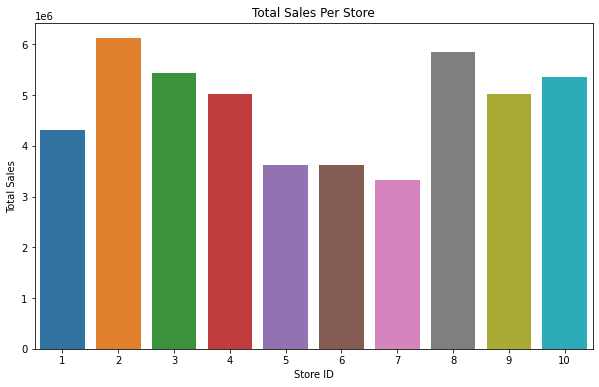

In [55]:
total_sales_per_store(df_all)

### Total sales per item

In [56]:
def total_sales_per_item(df):
    sales_by_item = df.groupby('item')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(20,8))
    sns.barplot(sales_by_item.item, sales_by_item.sales)
    
    ax.set(xlabel = "Item ID", ylabel = "Total Sales", title = "Total Sales Per Item")
    plt.savefig('Total Sales per Item.png')
    
    return sales_by_item

,item,sales
0,1,401384.0
1,2,1069564.0
2,3,669087.0
3,4,401907.0
4,5,335230.0
5,6,1068281.0
6,7,1068777.0
7,8,1405108.0
8,9,938379.0
9,10,1337133.0


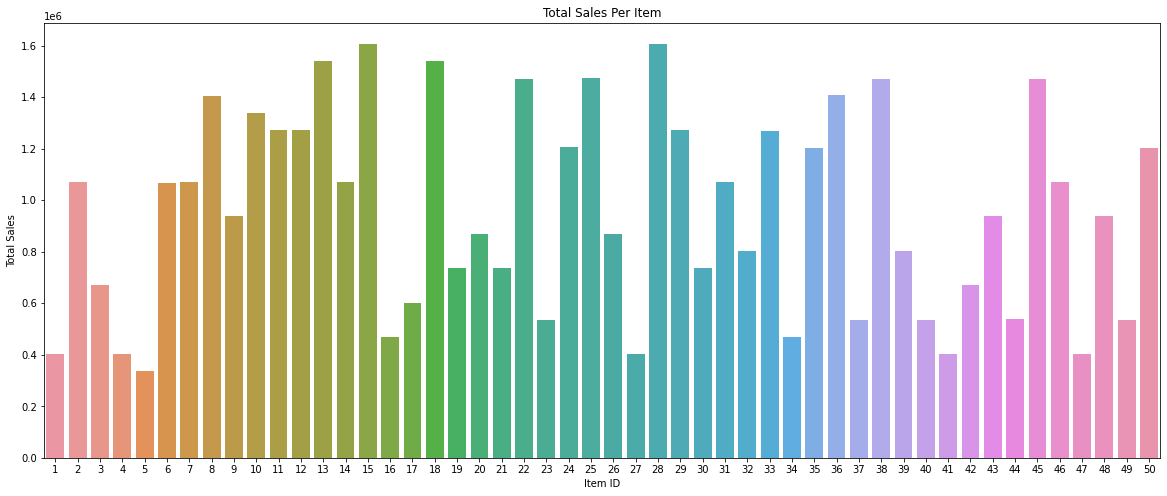

In [57]:
total_sales_per_item(df_all)

### Item sales per store

In [58]:
item_sales_per_store_df= pd.DataFrame(df_all.groupby(['store', 'item'])['sales'].sum())
item_sales_per_store_df.reset_index(inplace=True)
item_sales_per_store_df

,store,item,sales
0,1,1,36468.0
1,1,2,97050.0
2,1,3,60638.0
3,1,4,36440.0
4,1,5,30335.0
...,...,...,...
495,10,46,120601.0
496,10,47,45204.0
497,10,48,105570.0
498,10,49,60317.0


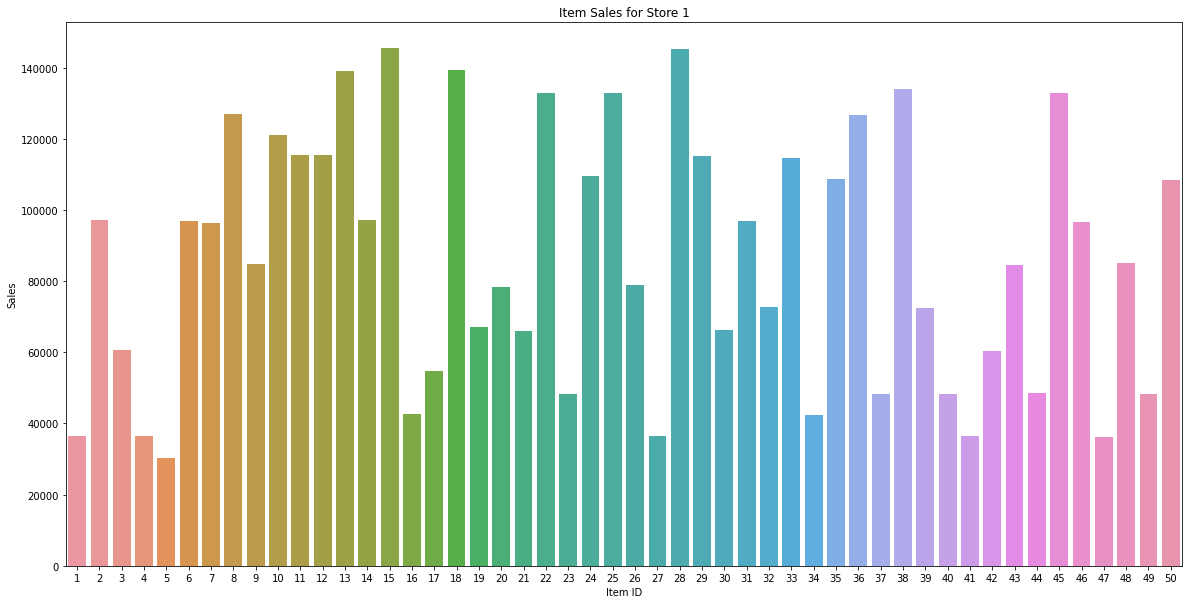

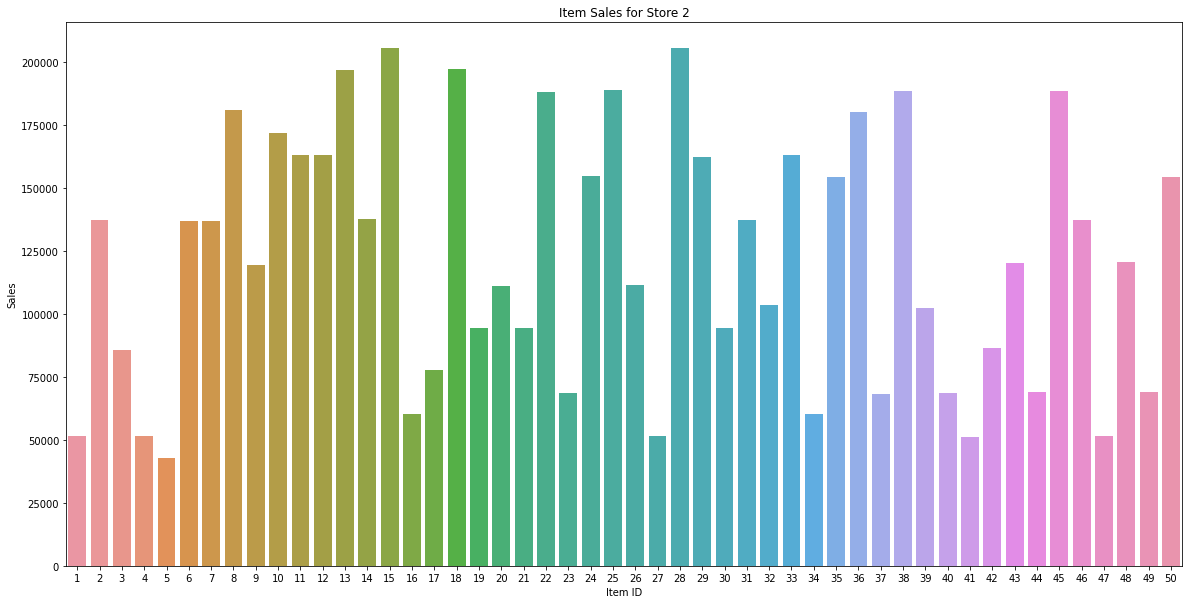

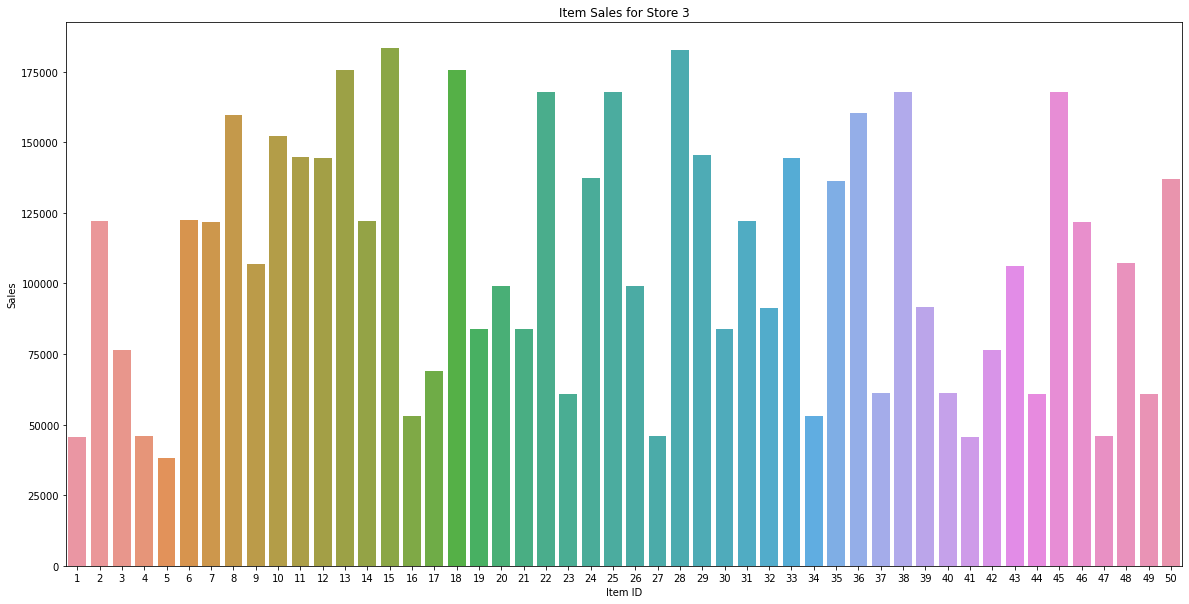

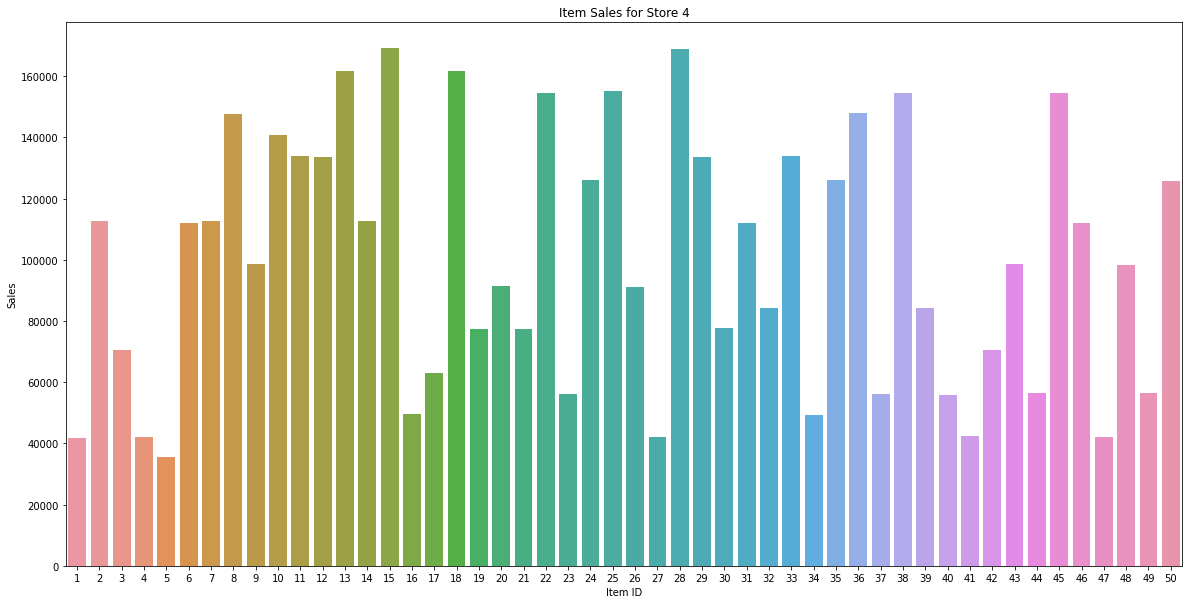

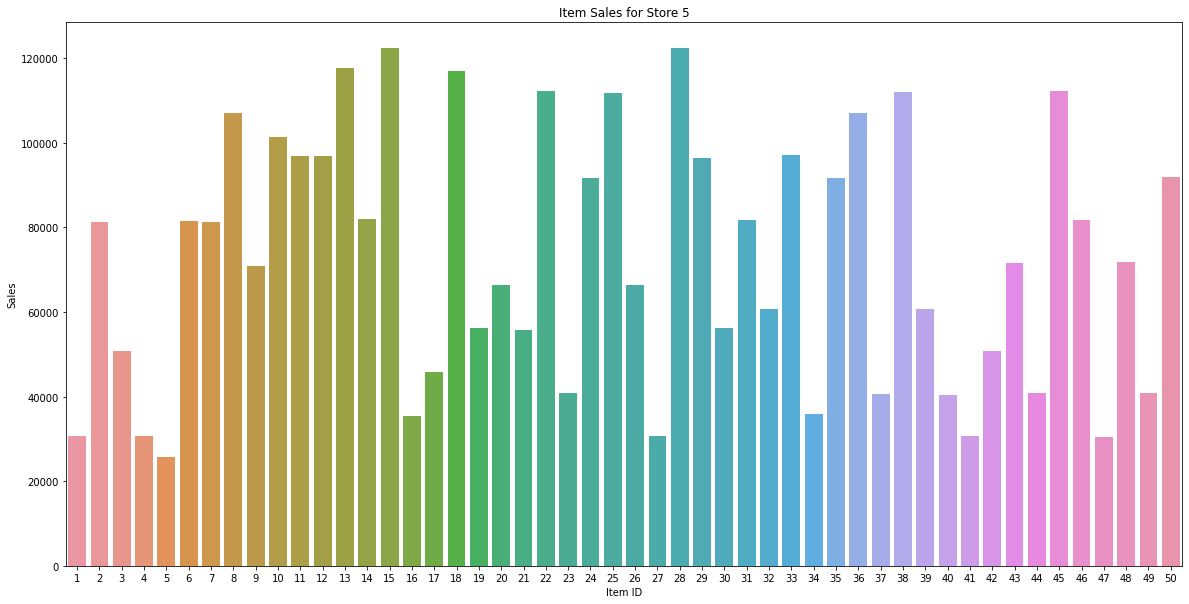

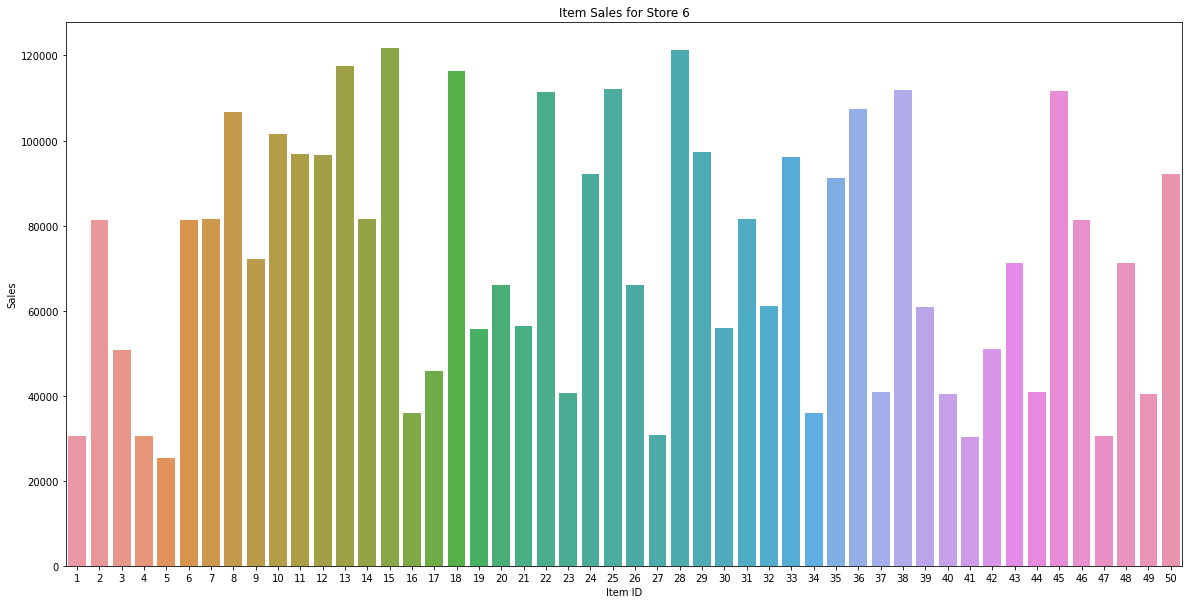

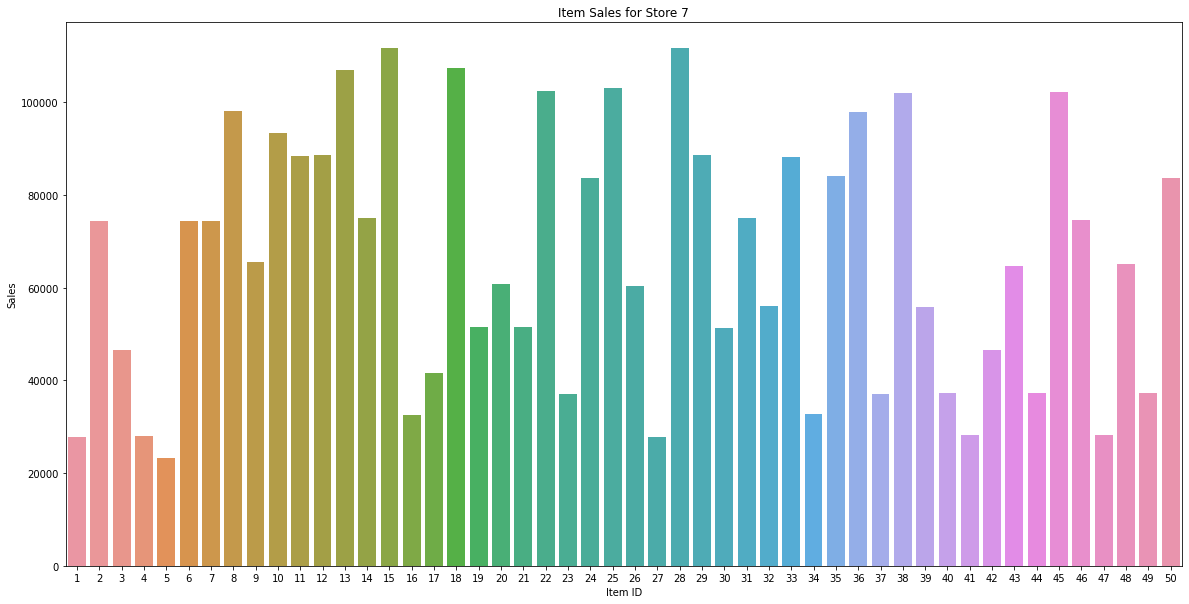

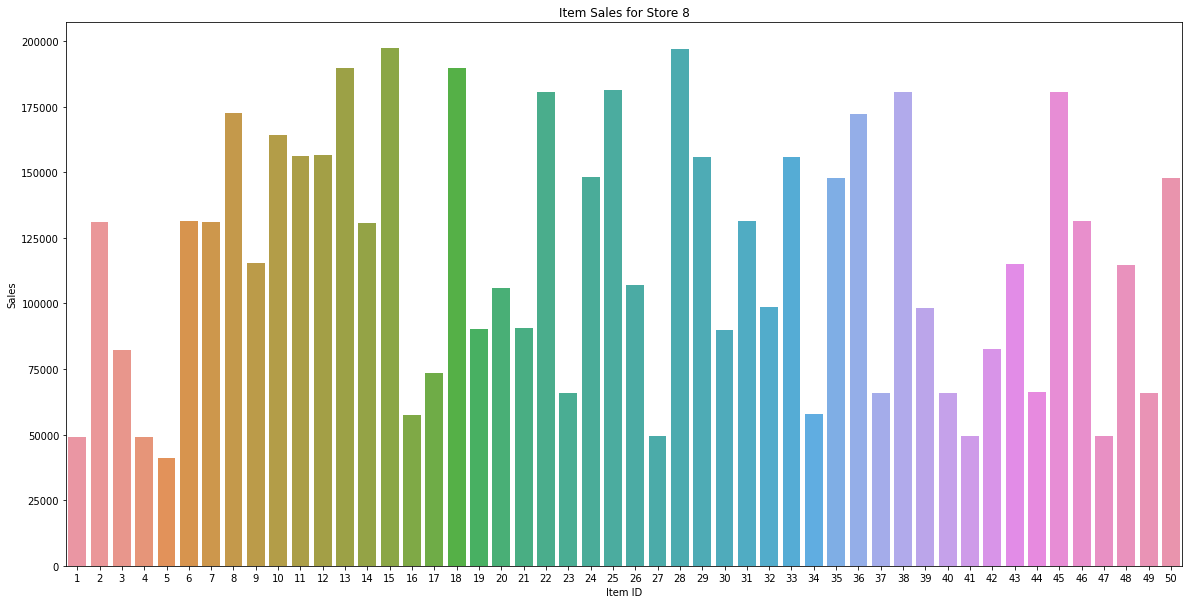

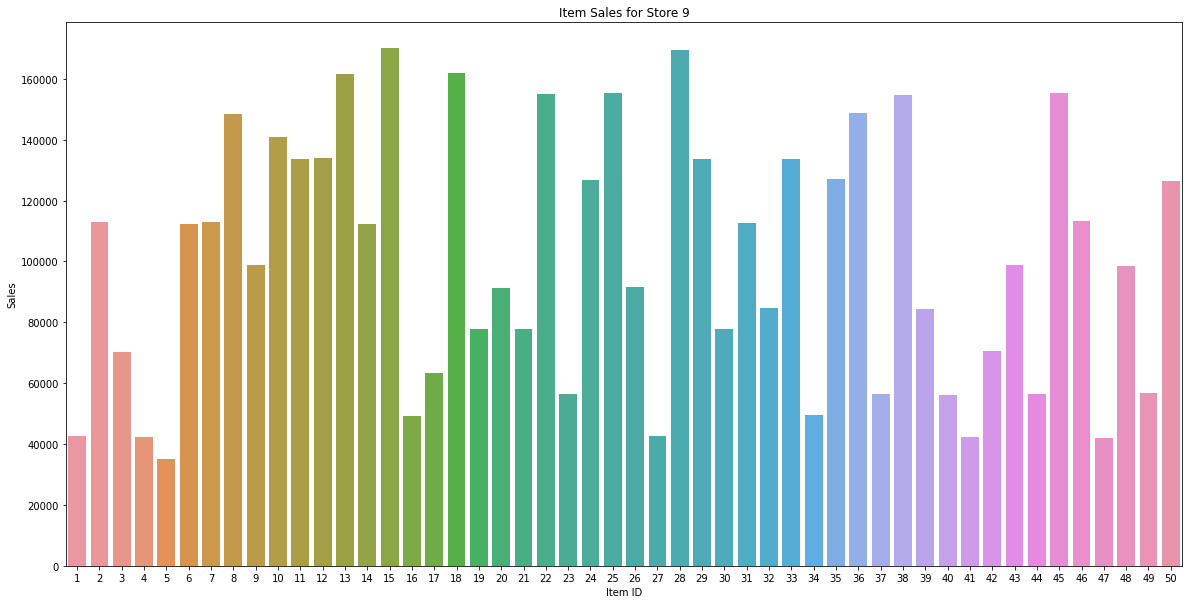

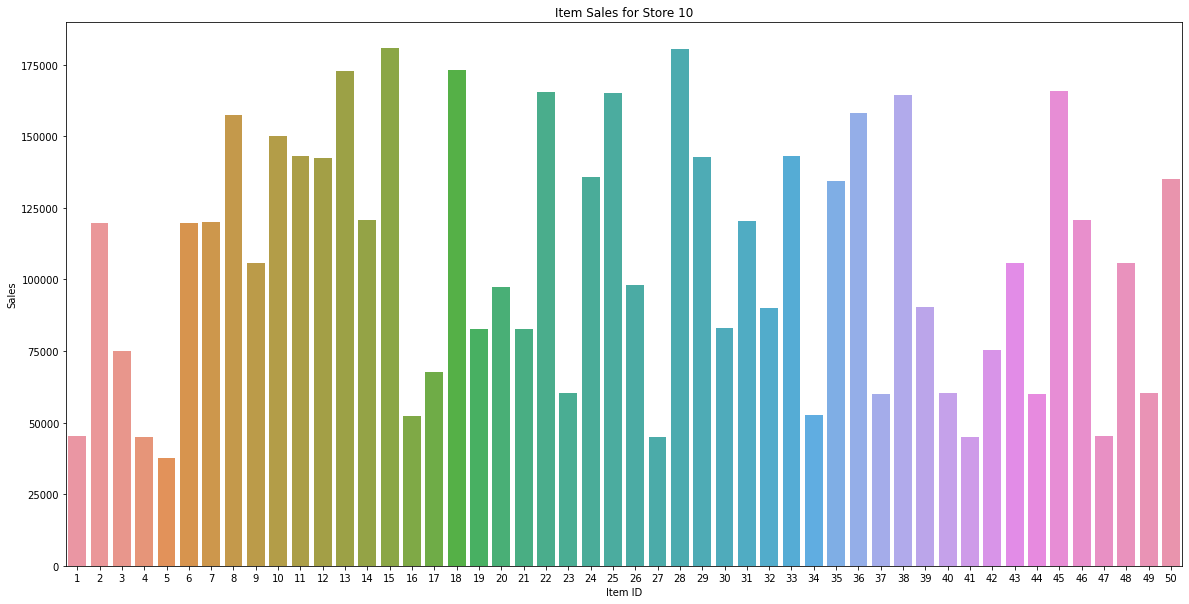

In [59]:
for i in df_all.store.unique():
    plt.figure(figsize=(20,10))
    sns.barplot(x = 'item', y = 'sales', data= item_sales_per_store_df.loc[item_sales_per_store_df.store==i], 
                order=item_sales_per_store_df.loc[item_sales_per_store_df.store==1].item)
    plt.xlabel("Item ID"),
    plt.ylabel("Sales")
    plt.title("Item Sales for Store {}".format(i))
    plt.savefig('Item Sales for store ' + str(i) + '.png')
    plt.show();